In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Original data

Value explanation:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

In [2]:
# Original Data from https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data
OriginalData = pd.read_csv('Book1.csv')
od = pd.DataFrame(OriginalData)
#od.head()

# Data exploration

In [3]:
# Ajusted data - shorter column names, False and True values changed to 0 and 1, etc.
data = pd.read_csv('ThoracicSurgery.csv') 
df = pd.DataFrame(data)
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
print('This data set has ', len(data), ' rows and ', len(data.columns), ' columns')

This data set has  454  rows and  17  columns


In [5]:
# are there any missing values?
df.notnull().any()

Diagnosis            True
FVC                  True
FEV1                 True
Performance          True
Pain                 True
Haemoptysis          True
Dyspnoea             True
Cough                True
Weakness             True
Tumor_Size           True
Diabetes_Mellitus    True
MI_6mo               True
PAD                  True
Smoking              True
Asthma               True
Age                  True
Death_1yr            True
dtype: bool

In [6]:
data.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [7]:
# Data separated to two groups - people who lived and who died:
lived = df[df['Death_1yr'] == 0]
died = df[df['Death_1yr'] == 1]

print('Number of patients:')
print('')
print('lived ', len(lived))
print('died', len(died))
print('')
print('Total', len(died) + len(lived))

Number of patients:

lived  385
died 69

Total 454


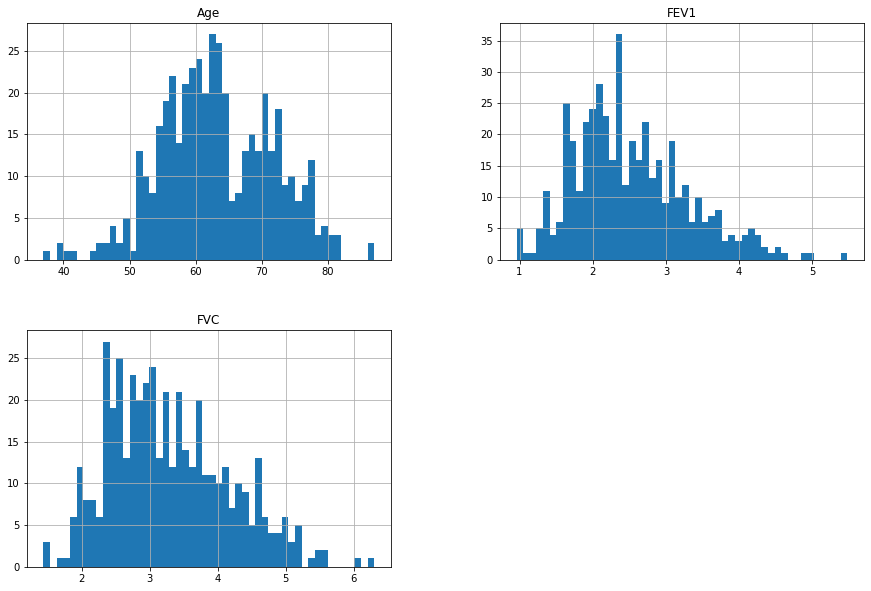

In [8]:
# histograms
df.hist(['Age', 'FEV1', 'FVC'], bins=50, figsize=(15,10))
plt.show()

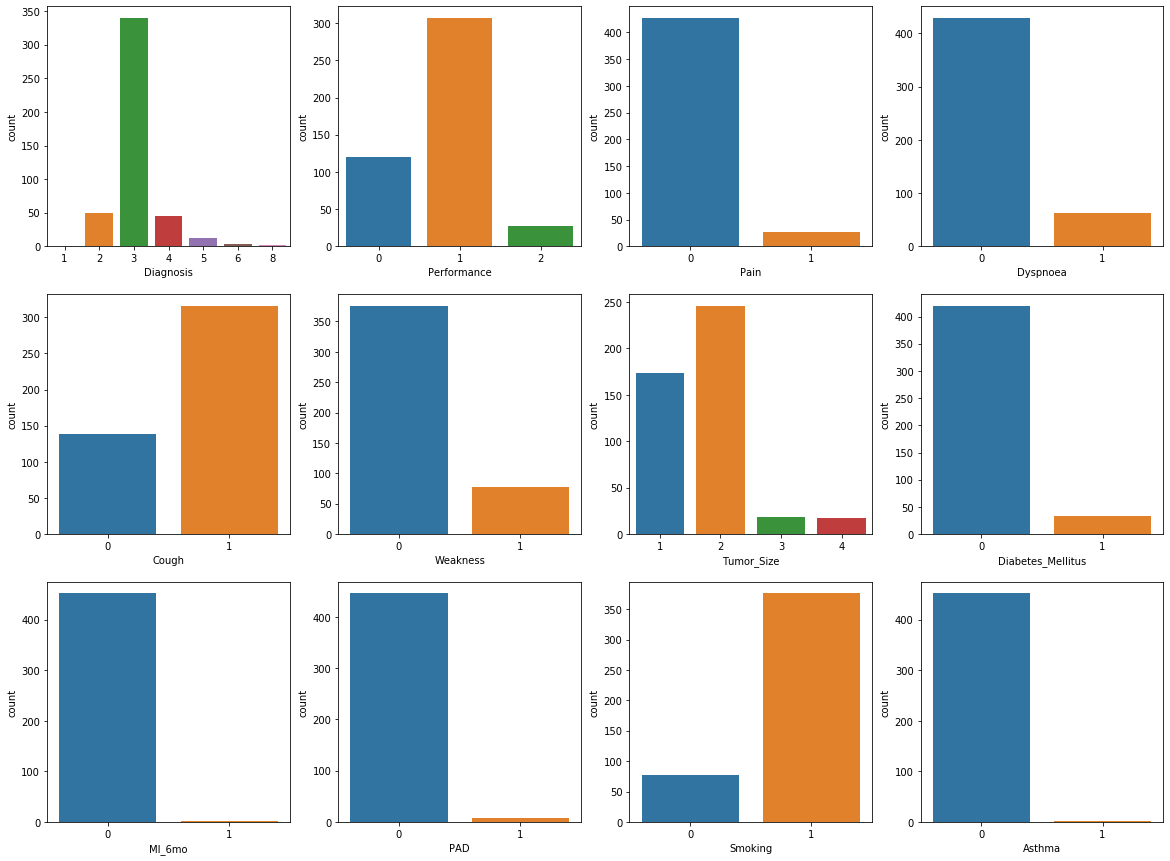

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(20,15))

sns.countplot(x = 'Diagnosis', data=data, ax=axes[0][0])
sns.countplot(x = 'Performance', data=data, ax = axes[0][1])
sns.countplot(x = 'Pain', data=data, ax = axes[0][2])
sns.countplot(x = 'Haemoptysis', data=data, ax = axes[0][3])
sns.countplot(x = 'Dyspnoea', data=data, ax = axes[0][3])
sns.countplot(x = 'Cough', data=data, ax = axes[1][0])
sns.countplot(x = 'Weakness', data=data, ax = axes[1][1])
sns.countplot(x = 'Tumor_Size', data=data, ax = axes[1][2])
sns.countplot(x = 'Diabetes_Mellitus', data=data, ax = axes[1][3])
sns.countplot(x = 'MI_6mo', data=data, ax = axes[2][0])
sns.countplot(x = 'PAD', data=data, ax = axes[2][1])
sns.countplot(x = 'Smoking', data=data, ax = axes[2][2])
sns.countplot(x = 'Asthma', data=data, ax = axes[2][3])


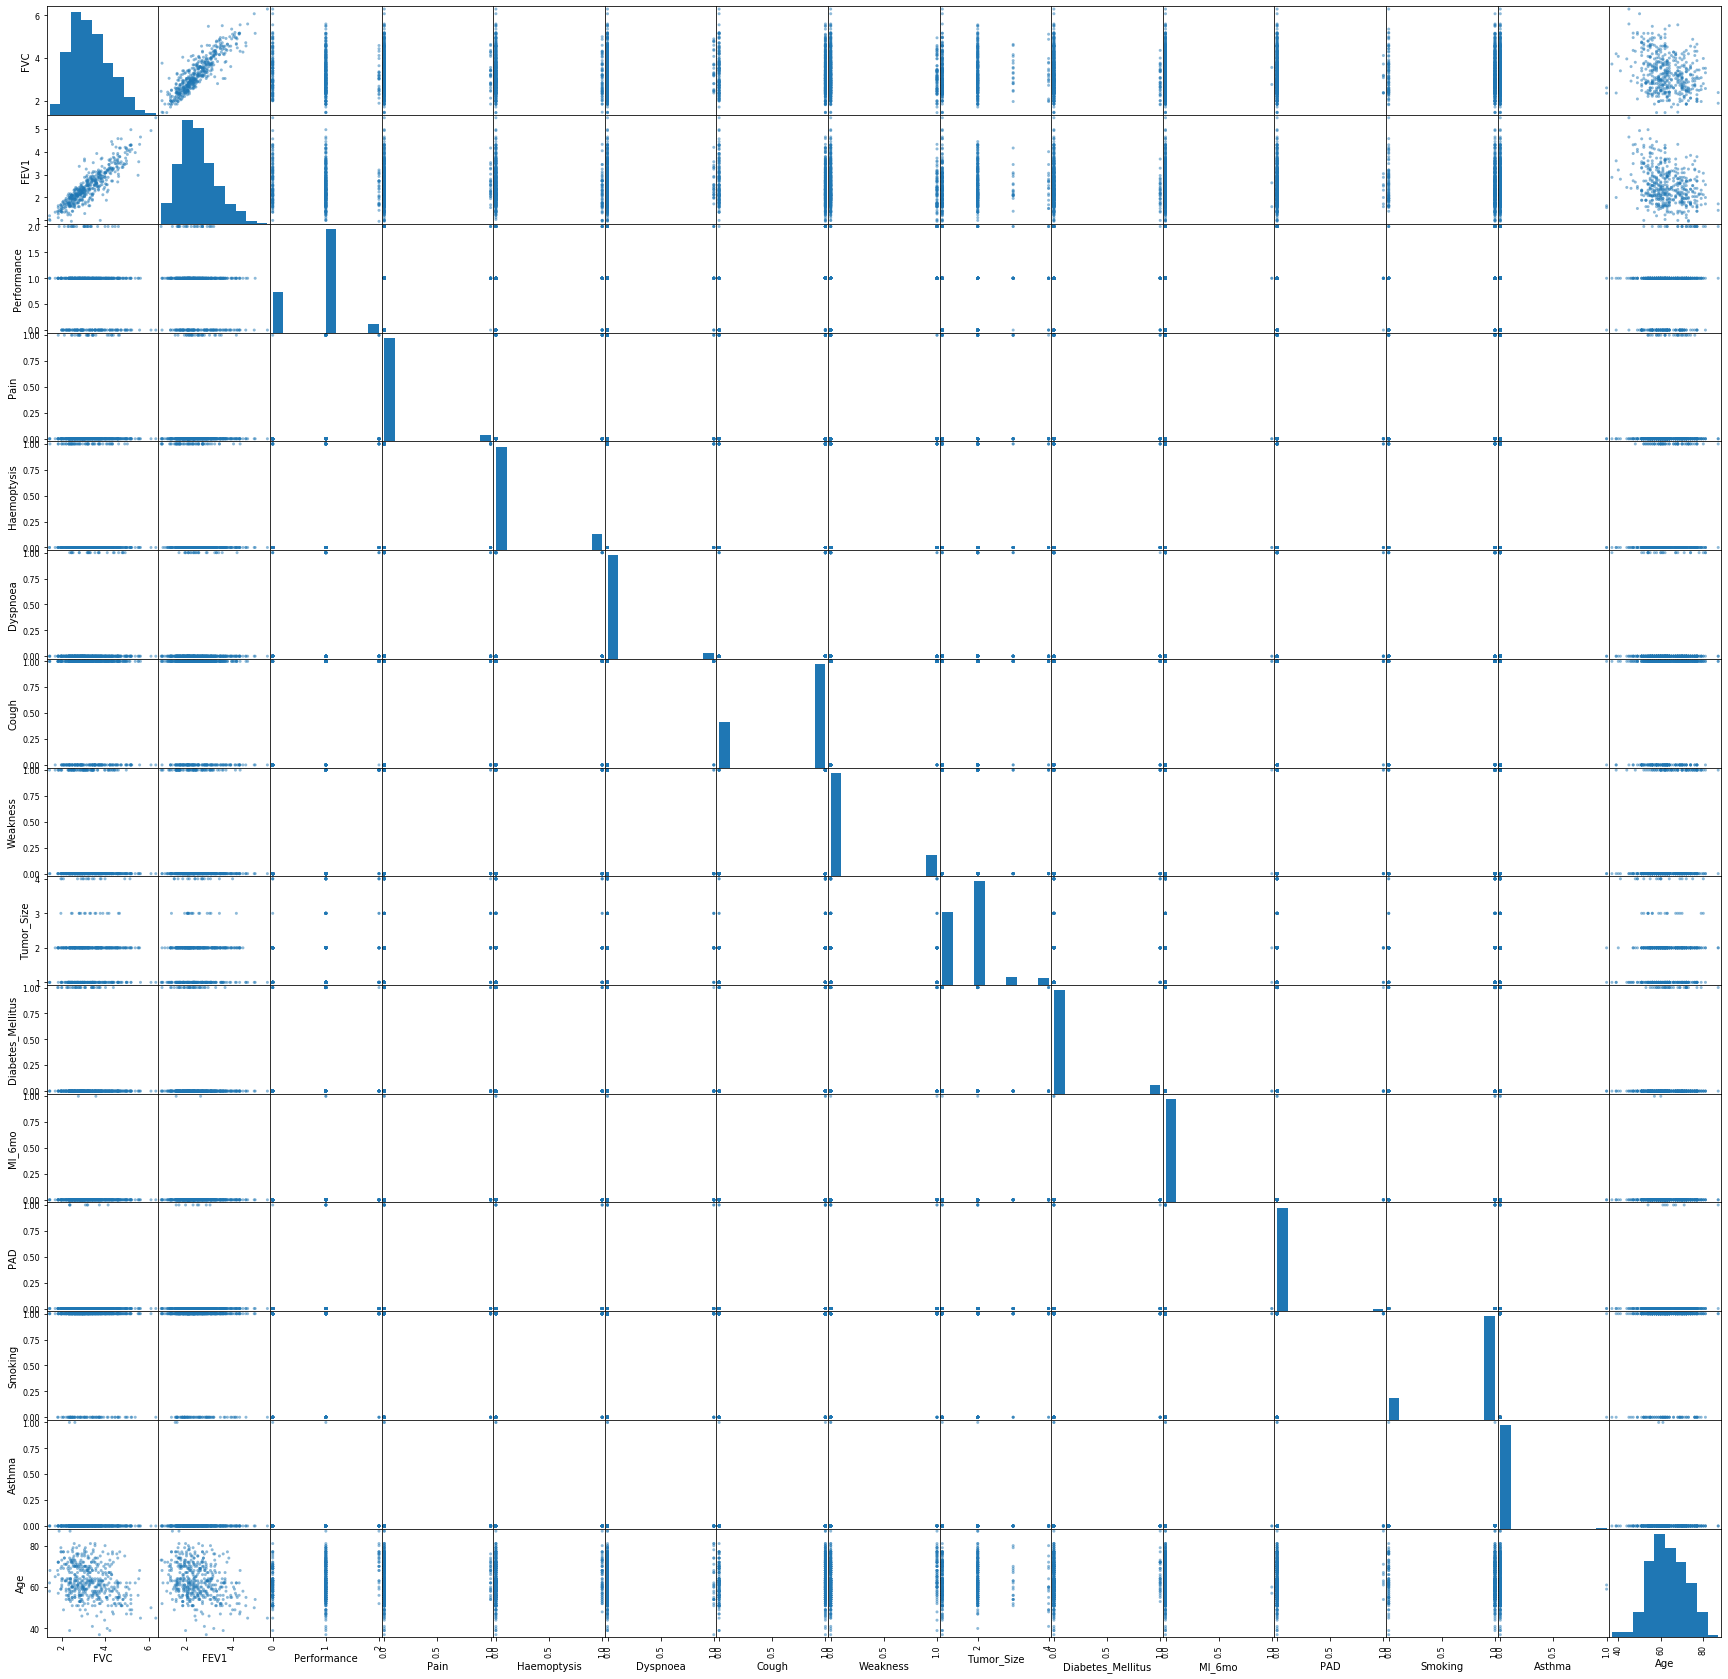

In [10]:
# Scatter matrices for every feature

scatter_matrix(data[['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']],
               figsize=(30, 30))
plt.show()

In [11]:
corr = data.corr()['Death_1yr'][:-1]
corr_f = corr[abs(corr)>0.05].sort_values(ascending = False)
print("There are {} features that have a correlation higher than 0.05: \n{}".format(len(corr_f), corr_f))


There are 11 features that have a correlation higher than 0.05: 
Tumor_Size           0.168335
Dyspnoea             0.112979
Diabetes_Mellitus    0.112646
Performance          0.094011
Cough                0.093019
Weakness             0.083691
Haemoptysis          0.081781
Smoking              0.078962
Pain                 0.075141
Diagnosis            0.073938
FEV1                -0.073388
Name: Death_1yr, dtype: float64


# Logistic Regression

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
# Data splitting to train and test sets using sklearn
X = df.drop('Death_1yr', axis='columns')
y = df['Death_1yr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# This is what the test (or train if you change to X_train) looks like
print(X_test)

     Diagnosis   FVC  FEV1  Performance  Pain  Haemoptysis  Dyspnoea  Cough  \
341          3  4.28  3.52            1     0            0         0      1   
417          3  1.44  1.20            1     0            0         0      1   
214          5  2.87  2.08            1     0            0         0      1   
62           3  3.72  2.84            0     0            0         0      0   
21           4  3.32  2.84            0     0            0         0      0   
442          3  3.60  3.00            1     0            0         0      1   
343          3  2.80  2.44            1     0            0         1      1   
46           3  2.64  2.12            1     0            0         0      1   
418          3  2.28  1.82            0     0            0         0      0   
119          4  3.30  2.56            0     0            0         0      0   
439          4  2.92  1.92            1     0            0         0      1   
26           3  3.40  3.06            1     0       

In [15]:
# The model using data as it is given

Logistic_model = LogisticRegression()

Logistic_model.fit(X_train, y_train)

C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred= Logistic_model.predict(X_test)
y_prob = Logistic_model.predict_proba(X_test)

In [17]:
print('Log-loss = {0:.02f}'.format(
    log_loss(y_test,y_prob)))
print('Hit rate = {0:.02%}'.format(
    (y_test == y_pred).mean()))

Log-loss = 0.42
Hit rate = 83.94%


In [18]:
cm=pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = ['lived', 'died'], columns = ['lived', 'died'])
print(cm)

       lived  died
lived    115     2
died      20     0


In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       117
           1       0.00      0.00      0.00        20

    accuracy                           0.84       137
   macro avg       0.43      0.49      0.46       137
weighted avg       0.73      0.84      0.78       137



The model doesn't predict 19 values correctly
First thing that could cause this is the uneven number of data for each class, so lets try to make them even

In [21]:
# Taking random samples from the data for each group

lived2 = lived.sample(50)
died2 = died.sample(50)
sampledata=pd.concat([lived2, died2], axis = 0)

In [22]:
# Repeating the process

# Data splitting to train and test sets using sklearn
X2 = sampledata.drop('Death_1yr', axis='columns')
y2 = sampledata['Death_1yr']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [23]:
# The model
Sample_model = LogisticRegression()

Sample_model.fit(X_train2, y_train2)

C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred2 = Sample_model.predict(X_test2)
y_prob2 = Sample_model.predict_proba(X_test2)

In [25]:
samplecm=pd.DataFrame(metrics.confusion_matrix(y_test2, y_pred2), index = ['lived', 'died'], columns = ['lived', 'died'])
print(samplecm)

       lived  died
lived      9     3
died       9     9


In [26]:
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.75      0.50      0.60        18

    accuracy                           0.60        30
   macro avg       0.62      0.62      0.60        30
weighted avg       0.65      0.60      0.60        30



No improvement

Lets try to leave only the most correlating features and drop the rest

In [27]:
data3 = sampledata[['Tumor_Size', 'Dyspnoea', 'Diabetes_Mellitus', 'Performance', 'Cough', 'Weakness',
                    'Haemoptysis', 'Haemoptysis', 'Smoking', 'Pain', 'Death_1yr']]

In [28]:
X3 = data3.drop('Death_1yr', axis='columns')
y3 = data3['Death_1yr']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3)

In [29]:
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred3 = model3.predict(X_test3)
y_prob3 = model3.predict_proba(X_test3)

In [31]:
print('Log-loss = {0:.02f}'.format(
    log_loss(y_test3,y_prob3)))
print('Hit rate = {0:.02%}'.format(
    (y_test3 == y_pred3).mean()))

Log-loss = 0.70
Hit rate = 50.00%


In [32]:
cm3=pd.DataFrame(metrics.confusion_matrix(y_test3, y_pred3), index = ['lived', 'died'], columns = ['lived', 'died'])
print(cm3)

       lived  died
lived     10     5
died      10     5


In [33]:
print(metrics.classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.50      0.33      0.40        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



F1 score has improved, more right predictions

Here lets try to even out the number of predictions, so the first model doesn't just assume that everyone belongs to the 0 class

In [34]:
y_pred_prob = Logistic_model.predict_proba(X_test)[:,1] # taking all the predictions for class 1

In [35]:
fpr, tpr, theresholds = metrics.roc_curve(y_test, y_pred_prob) # ROC curve for the first model

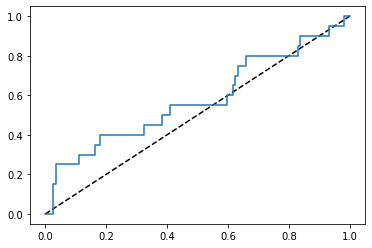

In [36]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.show()

In [37]:
metrics.accuracy_score(y_test, y_pred)

0.8394160583941606

In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       117
           1       0.00      0.00      0.00        20

    accuracy                           0.84       137
   macro avg       0.43      0.49      0.46       137
weighted avg       0.73      0.84      0.78       137



In [39]:
y_prob0 = y_prob[:,1] 

(array([41., 45., 22., 13.,  3.,  4.,  5.,  3.,  0.,  1.]),
 array([0.02610698, 0.08625021, 0.14639344, 0.20653667, 0.26667989,
        0.32682312, 0.38696635, 0.44710958, 0.50725281, 0.56739603,
        0.62753926]),
 <a list of 10 Patch objects>)

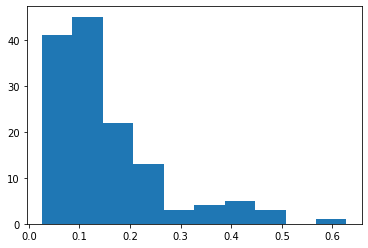

In [40]:
# the histogram for the predictions (class 1)

plt.hist(y_prob0)

The histodgram shows that all the most predictions are below 0.5 (default thereshold), so we need to make it a bit lower

In [41]:
from sklearn.preprocessing import binarize

y_prob0 = y_prob0.reshape(1,-1)

y_pred0 = binarize(y_prob0, 0.15)[0]

In [42]:
#new confusion matrix

newcm = metrics.confusion_matrix(y_test, y_pred0)
print(cm) # original confusion matrix
print(pd.DataFrame(newcm, index = ['lived', 'died'], columns = ['lived', 'died'])) # new cofusion matrix

       lived  died
lived    115     2
died      20     0
       lived  died
lived     77    40
died      11     9


In [43]:
print(metrics.classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       117
           1       0.18      0.45      0.26        20

    accuracy                           0.63       137
   macro avg       0.53      0.55      0.51       137
weighted avg       0.77      0.63      0.68       137



# Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier
from graphviz import Source
from IPython.display import display, SVG

In [45]:
# Train/test mask
np.random.seed(42)
mask = np.random.rand(df.shape[0]) < 0.7

----------------------------------------------------------------------
Tree for max_dept = 1

Correctly identified on train set - 84.66%, on test set - 85.11%


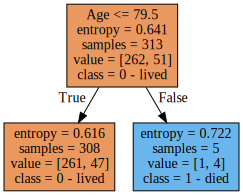

----------------------------------------------------------------------
Tree for max_dept = 2

Correctly identified on train set - 84.98%, on test set - 85.11%


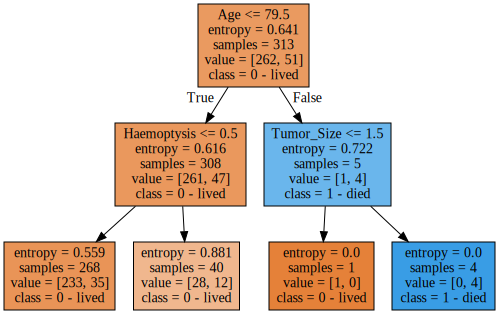

----------------------------------------------------------------------
Tree for max_dept = 3

Correctly identified on train set - 85.62%, on test set - 84.40%


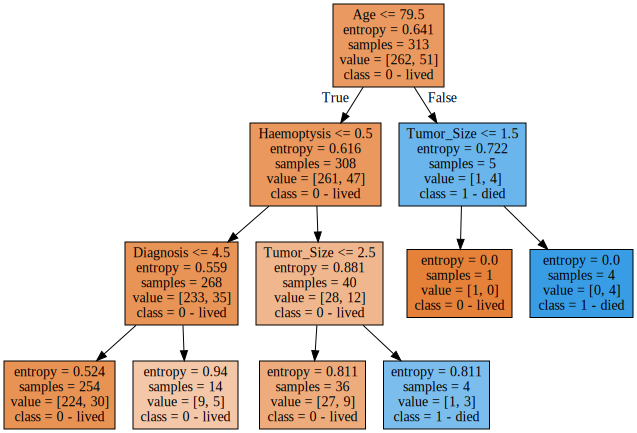

----------------------------------------------------------------------
Tree for max_dept = 4

Correctly identified on train set - 85.94%, on test set - 84.40%


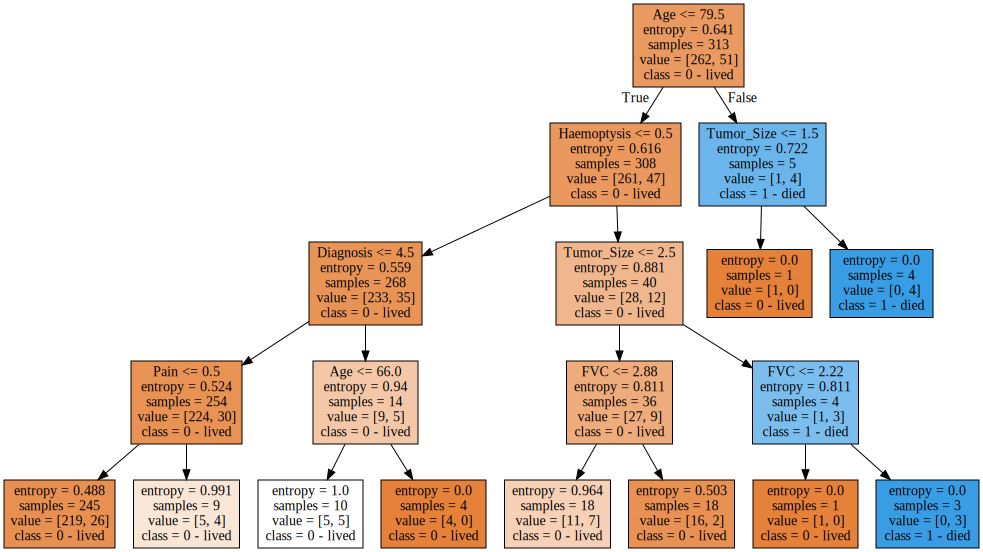

----------------------------------------------------------------------
Tree for max_dept = 5

Correctly identified on train set - 88.50%, on test set - 85.11%


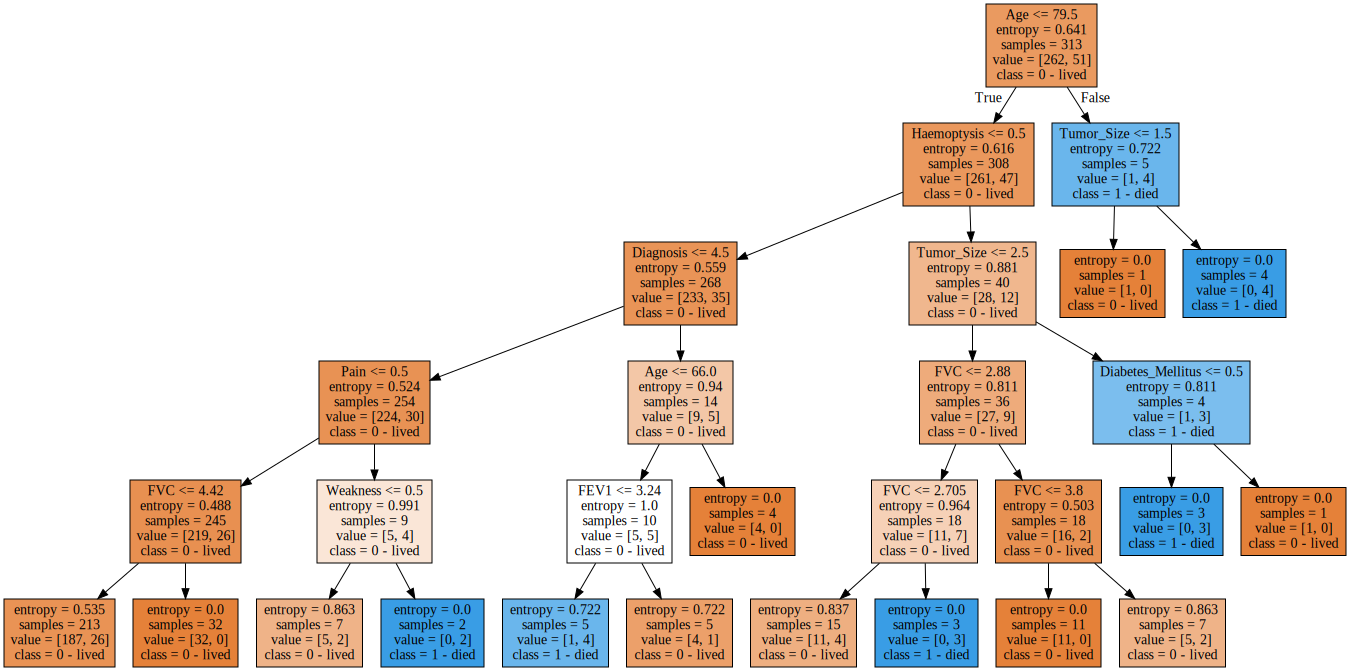

In [46]:
for max_depth in range(1, 6):
    print('-' * 70 + '\nTree for max_dept = {0}\n'.format(max_depth))
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    tree.fit(df[mask].drop('Death_1yr', axis=1), df[mask]['Death_1yr'])

    pred = tree.predict(df.drop('Death_1yr', axis=1))
    print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}'.format(
        (pred[mask] == df[mask]['Death_1yr']).mean(),        # train set
        (pred[~mask] == df[~mask]['Death_1yr']).mean()))     # test set

    graph = Source(export_graphviz(tree, out_file=None, filled = True,
                                   feature_names=df.drop('Death_1yr', axis=1).columns,
                                   class_names=['0 - lived', '1 - died']))
    display(SVG(graph.pipe(format='svg')))

# Random forest

In [52]:
# Base estimator
base = DecisionTreeClassifier(max_depth=5, splitter='best',
                    max_features='sqrt', criterion='entropy')

# Random forest 
ensemble = BaggingClassifier(base_estimator=base, n_estimators=1000,
                             bootstrap=True)

In [53]:
%%time

ensemble.fit(df[mask].drop('Death_1yr', axis=1), df[mask]['Death_1yr'])
pred = tree.predict(df.drop('Death_1yr', axis=1))

print('Correctly identified on train set - {0:.02%}, on test set - {1:.02%}\n'.format(
    (pred[mask] == df[mask]['Death_1yr']).mean(),        # train set
    (pred[~mask] == df[~mask]['Death_1yr']).mean()))     # test set

Correctly identified on train set - 88.50%, on test set - 85.11%

Wall time: 771 ms


# Neural Net

In [54]:
# Prepare data 
y = (df['Death_1yr'] == '1').astype('int').values
X = df.iloc[:, :17]

# Apply standart scaler
X = ((X - X.mean()) / X.std()).values

# Add ones for intercept
X = np.hstack([X, np.ones((X.shape[0], 1))])

# Make mask for tain/test set
np.random.seed(42)
mask = np.random.random(X.shape[0]) < 0.7

N, M = X.shape

C:\Users\Justina\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [55]:
epochs = 100
learning_rate = 0.01

# Initial weights between 0 and 1
np.random.seed(42)
W = np.random.random(M)

for _ in range(epochs):
    for features, label in zip(X[mask], y[mask]):
        pred = 0 if np.dot(features, W) > 0 else 1     # step function
        W += learning_rate * (label - pred) * features

pred_train = np.dot(X[mask], W) > 0
pred_test = np.dot(X[~mask], W) > 0
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 98.72%, Hit rate (test set) - 100.00%


In [56]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
diff = lambda x: x * (1 - x)

hidden = 3
learning_rate = 0.01
epochs = 100

# Initial weights between 0 and 1
np.random.seed(42)
W_0 = np.random.uniform(size=(M, hidden))
W_1 = np.random.uniform(size=(hidden, 1))

In [57]:
for _ in range(epochs):
    # Forward pass (make prediction)
    L_1 = sigmoid(X[mask].dot(W_0))
    L_2 = sigmoid(L_1.dot(W_1))
    # Backward pass (propagate diff)
    diff_2 = (y[mask, np.newaxis] - L_2) * diff(L_2)
    diff_1 = np.dot(diff_2, W_1.T) * diff(L_1)
    W_1 += learning_rate * np.dot(L_1.T, diff_2)
    W_0 += learning_rate * np.dot(X[mask].T, diff_1)

pred_train = (sigmoid(sigmoid(X[mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
pred_test = (sigmoid(sigmoid(X[~mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 100.00%, Hit rate (test set) - 100.00%
